In [2]:
import pandas as pd
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (14,6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# data dumped from https://www.investing.com/currencies/usd-eur-historical-data
# base_file = 'us_500_futures.csv'
# base_file = 'usd_eur_data.csv'
base_file = 's_and_p_500_hist.csv'

In [4]:
# load data and get some information about it
df = pd.read_csv(base_file, index_col='Date')
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (2516, 6)
Columns: Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [5]:
# Drop unecessary columnts
columns_to_drop = [c for c in df.columns if c not in ['Date', 'Price']]
df = df.drop(columns_to_drop, axis=1)
print("Columns:", df.columns)
df.head(5)

Columns: Index(['Price'], dtype='object')


,Price
Date,
"Dec 31, 2019","3,230.78"
"Dec 30, 2019","3,221.29"
"Dec 27, 2019","3,240.02"
"Dec 26, 2019","3,239.91"
"Dec 24, 2019","3,223.38"


In [6]:
# change Data order, so the oldest entries will be the first one
df = df.reindex(index=df.index[::-1])
# make sure prices are numeric
df['Price'] = pd.to_numeric(df['Price'].apply(lambda x: x.replace(',', '')))
# and convert date to datetime format
df.index = pd.to_datetime(df.index)
df.head(5)

,Price
Date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98


In [7]:
# add missed entries(holidays) to dataframe
full_time_range = pd.date_range(start=df.index[0], end=df.index[-1])
df = df.reindex(index=full_time_range)
print(df.head(10))
df = df.interpolate()
print("\nAfter interpolation:")
print(df.head(10))

              Price
2010-01-04  1132.99
2010-01-05  1136.52
2010-01-06  1137.14
2010-01-07  1141.69
2010-01-08  1144.98
2010-01-09      NaN
2010-01-10      NaN
2010-01-11  1146.98
2010-01-12  1136.22
2010-01-13  1145.68

After interpolation:
                  Price
2010-01-04  1132.990000
2010-01-05  1136.520000
2010-01-06  1137.140000
2010-01-07  1141.690000
2010-01-08  1144.980000
2010-01-09  1145.646667
2010-01-10  1146.313333
2010-01-11  1146.980000
2010-01-12  1136.220000
2010-01-13  1145.680000


In [8]:
# save cleaned data
df.to_csv(base_file.replace('.csv', '_cleaned.csv'), header=False)

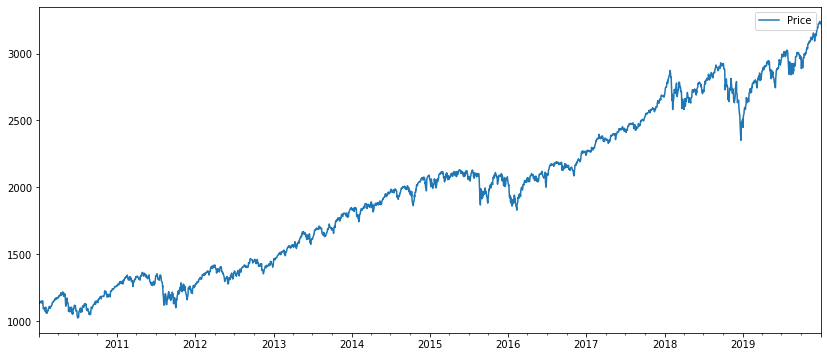

In [7]:
df.plot();

In [8]:
# Helper functions for plot
def list_available_years(df):
    return sorted(list(set([idx.year for idx in df.index])))

def reindex_to_range(df):
    df.index = range(df.shape[0])
    return df

def plot_year(df, year, ax=None):
    df = df[df.index.year == year]
    reindex_to_range(df)
    return df.plot(ax=ax)

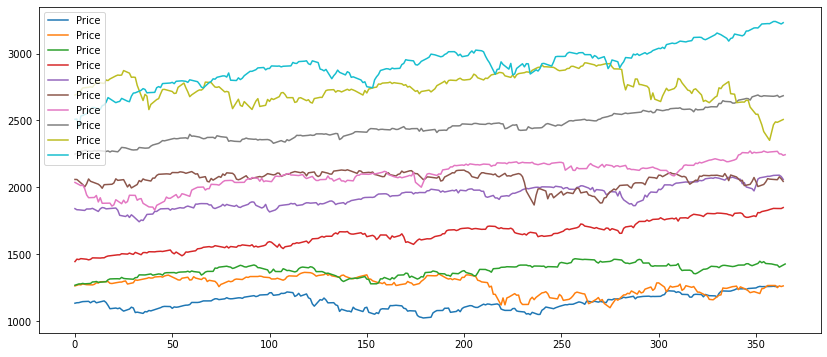

In [9]:
# Visualize slice from each year
ax = None
for year in list_available_years(df):
    ax = plot_year(df, year, ax=ax)

In [10]:
# define error
def mase(predicted, expected):
    predicted, expected = np.array(predicted), np.array(expected)
    min_size = min(predicted.shape[0], expected.shape[0])
    predicted, expected = predicted[:min_size], expected[:min_size]
    errors = np.mean(np.abs(predicted - expected))
    denom = np.mean(np.abs(expected[1:] - expected[:-1]))
    return errors / denom

# define help plot function
def visualise(predicted, expected, title):
    fig, ax = subplots()
    ax.plot(predicted)
    ax.plot(expected)
    ax.legend(["Predicted", "Ground Truth"])
    ax.set_title(title)

In [11]:
# split data to train and test
all_years = list_available_years(df)
# all years but last
train_years = all_years[:-1]
train_data = np.array(df[df.index.year.isin(train_years)]['Price'])
print("train data size:", len(train_data))
# last year
test_year = all_years[-1]
test_data = np.array(df[df.index.year == test_year]['Price'])
print("test data size:", len(test_data))
# list to accumulate errors from various methods
methods_and_errors = []

train data size: 3284
test data size: 365


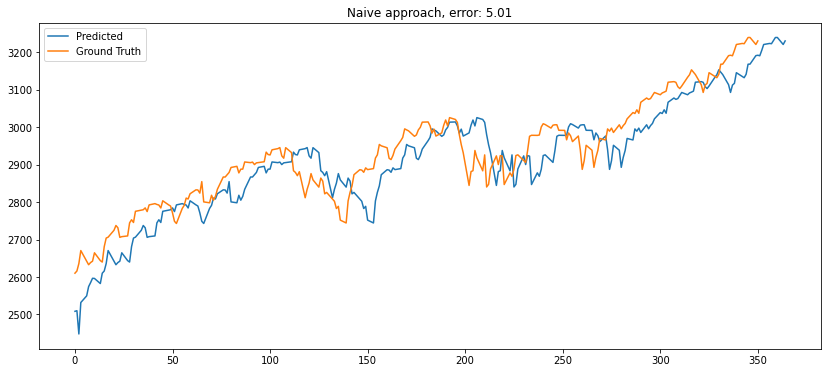

In [12]:
# define and try naive prediction method
def naive(train, expected, period=14):
    """Копируем ближайшие данные за прошлый период с определенным смещением"""
    predicted, expected = np.copy(expected), np.copy(expected[period:])
    error = mase(predicted, expected)
    visualise(predicted, expected, title='Naive approach, error: %.2f' % error)
    return error

# accumulate error results
methods_and_errors.append(['naive', naive(np.copy(train_data), np.copy(test_data))])

In [13]:
# define non trivial approach

# some helper methods
def normalize(array):
    array = np.array(array)
    array = array - np.min(array)
    array = array / np.max(array)
    return array

def non_trivial(train_df, test_df):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-13-d6d5e85d3497>, line 11)

In [16]:
# columns m1..m366 - month, q1..q427 - quarters?.. or it seems to me that this is just locations..
# 12 entries per year, 309 entries total -> abt 25.75 years
df_debug = pd.read_csv('tourism2_revision2.csv')
print(df_debug.shape)
print(df_debug.columns)
# data(:, 1) - 1st columnt for matlab
# data(row, column)

(309, 795)
Index(['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10',
       ...
       'q420', 'q421', 'q422', 'q423', 'q424', 'q425', 'q426', 'q427',
       'Unnamed: 793', 'Unnamed: 794'],
      dtype='object', length=795)


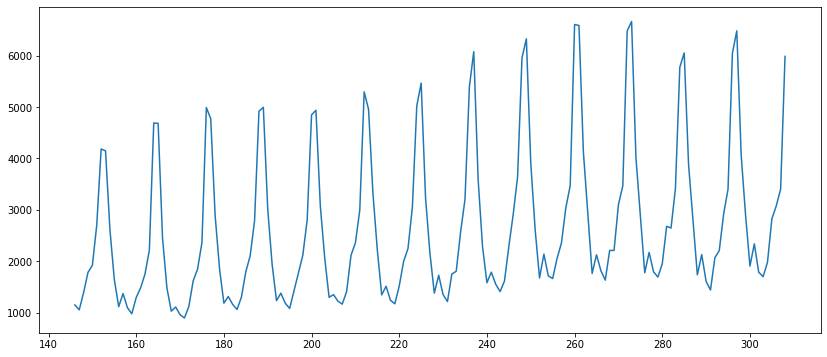

In [17]:
plot(df_debug['m1'])